In [131]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv("data/Algerian_forest_fires_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [133]:
df.drop(['day','month','year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [134]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [135]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [136]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [137]:
## Independent and Dependent Features

X = df.drop('FWI',axis=1)
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [138]:
y = df['FWI']

In [139]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [140]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [141]:
## Feature Selection
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

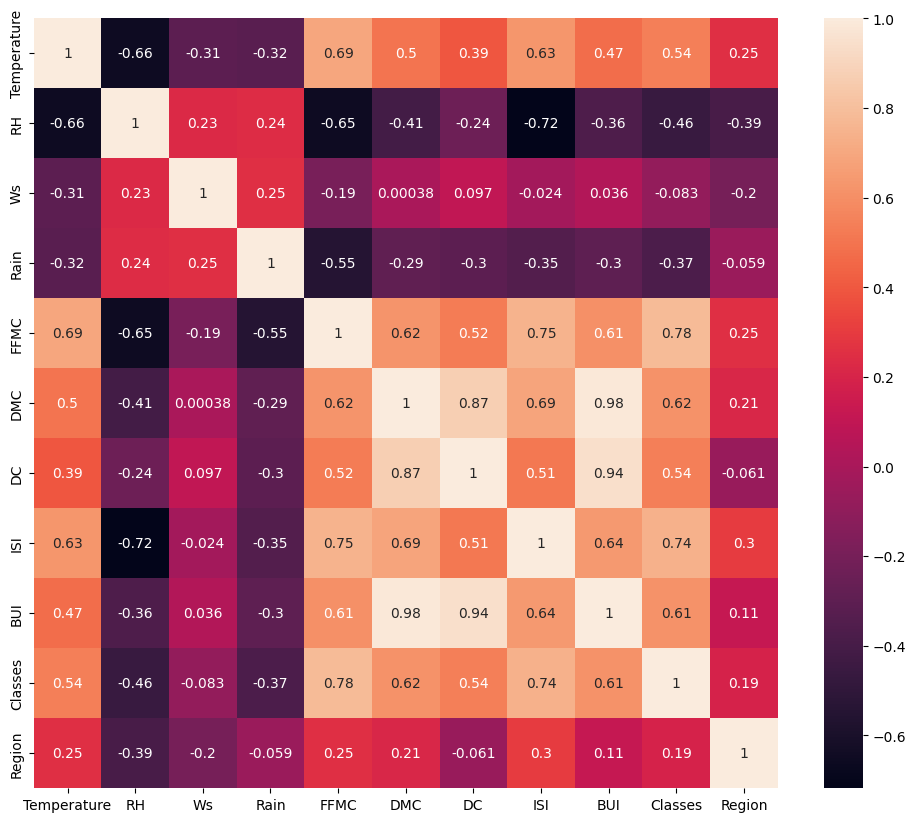

In [142]:
## Check For MultiCorrelaniraty
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [143]:
def correlation(dataset, treshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > treshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname) 
    return col_corr  

In [144]:
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

“Biz neden korelasyonu yüksek olan sütunları siliyoruz ki?
Sonuçta yüksek korelasyon, bağımlı değişkenle güçlü ilişki demek değil mi?”

Yani diyorsun ki:
“Bağımlı değişken (y) ile yüksek korelasyonu olanı silmek saçma değil mi?”
Ve haklısın — ama burada kritik fark neyin korelasyonuna baktığımızda.

Buradaki amacımız:

"Birbirine çok benzeyen" iki özellikten birini atmak.

Çünkü ikisi de aynı bilgiyi temsil ediyor.

Bu durumda modelin öğrenmesi fazla benzer bilgiyle “şişiyor” → multicollinearity oluşuyor.

In [147]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train,X_test

(     Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 97            29  74  19   0.1  75.8   3.6   2.1        0       0
 141           31  72  14   0.2  60.2   3.8   0.8        0       1
 192           40  31  15   0.0  94.2  22.5  16.6        1       1
 68            32  60  18   0.3  77.1  11.3   2.2        0       0
 119           32  47  14   0.7  77.5   7.1   1.8        0       0
 ..           ...  ..  ..   ...   ...   ...   ...      ...     ...
 106           24  82  15   0.4  44.9   0.9   0.2        0       0
 14            28  80  17   3.1  49.4   3.0   0.4        0       0
 92            25  76  17   7.2  46.0   1.3   0.2        0       0
 179           34  59  16   0.0  88.1  19.5   7.4        1       1
 102           30  77  21   1.8  58.5   1.9   1.1        0       0
 
 [182 rows x 9 columns],
      Temperature  RH  Ws  Rain  FFMC   DMC  ISI  Classes  Region
 24            31  64  15   0.0  86.7  14.2  5.7        1       0
 6             33  54  13   0.0  88.2

#### Standardization

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526, -0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851,  1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526, -0.98907071]], shape=(182, 9)),
 array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01, -9.89070710e-

Text(0.5, 1.0, 'X_train After Scaling')

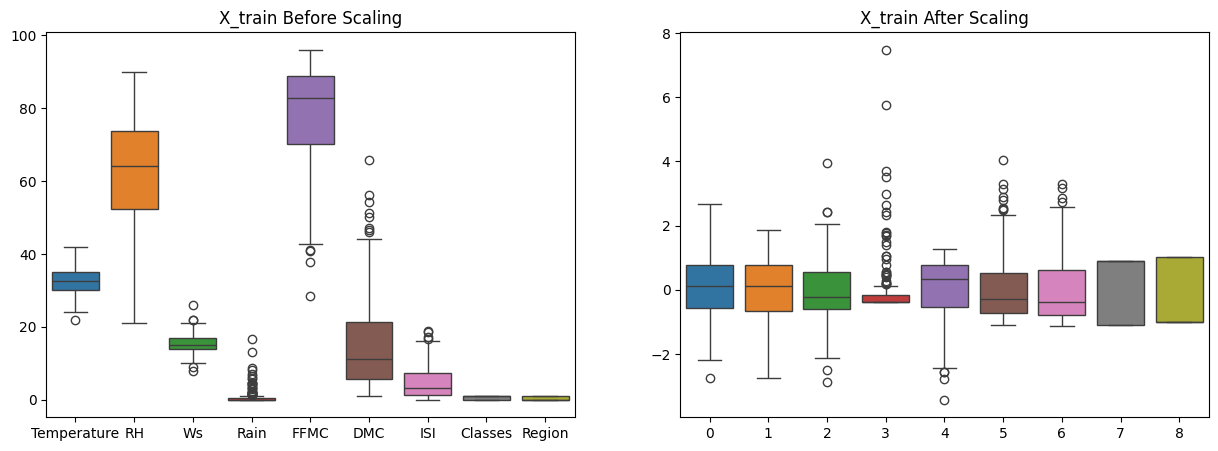

In [149]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
my_df= pd.DataFrame(data=X_train_scaled,columns=X_train.columns) 
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

#### LinerRegression Model 

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

Mean absoulute error: 0.5468236465249978
R^2 Score: 0.9847657384266951


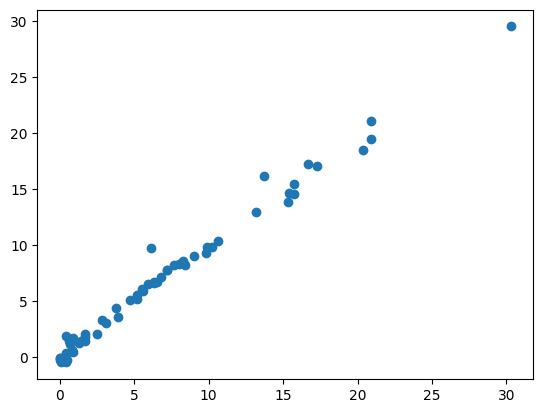

In [160]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

y_pred=linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absoulute error:",mae)
print("R^2 Score:",score)
plt.scatter(y_test,y_pred)

In [161]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

Mean absoulute error: 1.133175994914409
R^2 Score: 0.9492020263112388


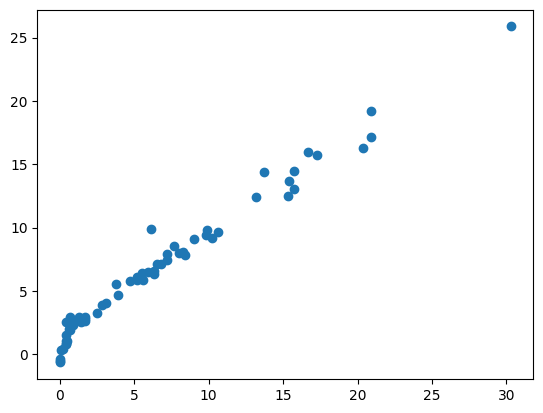

In [162]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

y_pred=lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absoulute error:",mae)
print("R^2 Score:",score)
plt.scatter(y_test,y_pred)

In [163]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

Mean absoulute error: 0.5642305340105715
R^2 Score: 0.9842993364555512


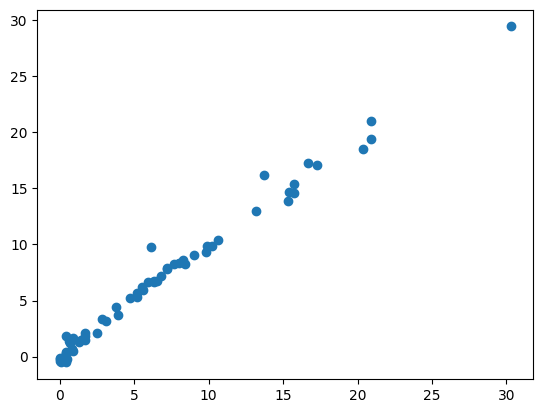

In [164]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

y_pred=ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absoulute error:",mae)
print("R^2 Score:",score)
plt.scatter(y_test,y_pred)

In [ ]:
## Elastic Net Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

Mean absoulute error: 1.8822353634896005
R^2 Score: 0.8753460589519703


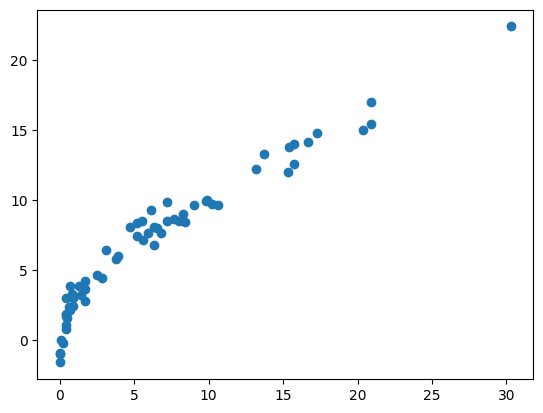

In [166]:
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)

y_pred=elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absoulute error:",mae)
print("R^2 Score:",score)
plt.scatter(y_test,y_pred)

In [ ]:
##R^2 1'e yaklaştıkça modeli iyi açıklar
## MAE ne kadar düşükse o kadar.